<a href="https://colab.research.google.com/github/Ganga-dhar/cotton-disease-calssfication-using-Transfer-Learning/blob/main/Using_ResNet101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "mathyam" # username from the json file
os.environ['KAGGLE_KEY'] = "ac43c48d6cec800e4ff66f9e864fba08" # Provide your key from the json file
#!kaggle competitions download -c dogs-vs-cats # api copied from kaggle

!kaggle datasets download -d janmejaybhoi/cotton-disease-dataset

 93% 137M/148M [00:01<00:00, 68.1MB/s]
100% 148M/148M [00:01<00:00, 85.2MB/s]


In [4]:
# Upload data and extract the contents
from zipfile import ZipFile

file_name = "/content/cotton-disease-dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Cotton Disease/train'
valid_path = '/content/Cotton Disease/test'


In [7]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3 
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [8]:
# Here we will be using imagenet weights

resnet = ResNet101(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

171450368/171446536 [==============================] - 2s 0us/step


In [9]:

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [10]:
resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [11]:
# useful for getting number of output classes
folders = glob('/content/Cotton Disease/train*')

In [13]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [14]:
prediction = Dense(4, activation='softmax')(x)

#create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [15]:
# Model Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [16]:
# tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [20]:
# Fit the model
r = model.fit_generator( training_set,
                         validation_data=test_set,
                        epochs=20,
                        steps_per_epoch=len(training_set),
                        validation_steps=len(test_set),)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 71s 599ms/step - loss: 2.1137 - accuracy: 0.4095 - val_loss: 1.2750 - val_accuracy: 0.5283
Epoch 2/20
61/61 [==============================] - 33s 543ms/step - loss: 0.9429 - accuracy: 0.6258 - val_loss: 1.1189 - val_accuracy: 0.5094
Epoch 3/20
61/61 [==============================] - 33s 543ms/step - loss: 0.9730 - accuracy: 0.6110 - val_loss: 1.2865 - val_accuracy: 0.5566
Epoch 4/20
61/61 [==============================] - 33s 543ms/step - loss: 0.8050 - accuracy: 0.6658 - val_loss: 1.0435 - val_accuracy: 0.5943
Epoch 5/20
61/61 [==============================] - 33s 540ms/step - loss: 0.8687 - accuracy: 0.6612 - val_loss: 1.0004 - val_accuracy: 0.6321
Epoch 6/20
61/61 [==============================] - 33s 543ms/step - loss: 0.8194 - accuracy: 0.6838 - val_loss: 0.8507 - val_accuracy: 0.6415
Epoch 7/20
61/61 [==============================] - 33s 540ms/step - loss: 0.8382 - accuracy: 0.6720 - val_loss: 1.0646 - val_accuracy: 0.6132

In [21]:
import matplotlib.pyplot as plt

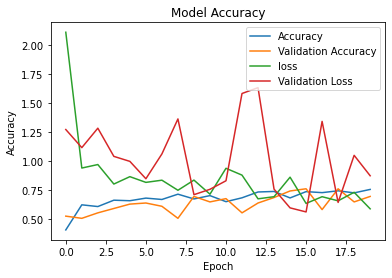

In [22]:
#Ploting Acuracy & Loss
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [23]:
#Save the model as h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet101.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Testing

EXAMPLE-1


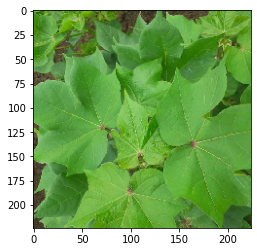

In [24]:
#Example 1

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/Cotton Disease/test/fresh cotton plant/dsd (275)_iaip.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [25]:
preds

array([[0.00367244, 0.18669729, 0.27956513, 0.5300651 ]], dtype=float32)

In [26]:
preds = np.argmax(preds, axis=1)

In [27]:
if preds==0:
  print("The leaf is diseased cotton leaf")
elif preds==1:
  print("The leaf is diseased cotton plant")
elif preds==2:
  print("The leaf is fresh cotton leaf")
else:
  print("The leaf is fresh cotton plant")

The leaf is fresh cotton plant
